## CalEnviroScreen Analysis - Beverly Hills
This notebook cleans up CalEnviroscreen data and then zooms into Beverly Hills in particular.

# Clean CalEnviroScreen

In [1]:
import pandas as pd
import geopandas as gpd

In [2]:
df = pd.read_csv('Data/Calenviroscreen4.csv',
    dtype=
    {
        'Census Tract':str,
        'California County':str,
        'Approximate Location': str
    }
)
df.head()

,Census Tract,Total Population,California County,ZIP,Approximate Location,Longitude,Latitude,CES 4.0 Score,CES 4.0 Percentile,CES 4.0 Percentile Range,...,Linguistic Isolation Pctl,Poverty,Poverty Pctl,Unemployment,Unemployment Pctl,Housing Burden,Housing Burden Pctl,Pop. Char.,Pop. Char. Score,Pop. Char. Pctl
0,6019001100,2780,Fresno,93706,Fresno,-119.781696,36.709695,93.18,100.00,95-100% (highest scores),...,79.37,76.0,98.92,12.8,93.83,30.3,91.04,93.16,9.66,99.72
1,6077000700,4680,San Joaquin,95206,Stockton,-121.287873,37.943173,86.65,99.99,95-100% (highest scores),...,95.53,73.2,98.39,19.8,99.21,31.2,92.28,93.17,9.66,99.74
2,6037204920,2751,Los Angeles,90023,Los Angeles,-118.197497,34.017500,82.39,99.97,95-100% (highest scores),...,81.55,62.6,93.39,6.4,61.53,20.3,63.97,83.75,8.69,95.79
3,6019000700,3664,Fresno,93706,Fresno,-119.827707,36.734535,81.33,99.96,95-100% (highest scores),...,78.71,65.7,95.35,15.7,97.35,35.4,96.41,94.64,9.82,99.89
4,6019000200,2689,Fresno,93706,Fresno,-119.805504,36.735491,80.75,99.95,95-100% (highest scores),...,86.56,72.7,98.30,13.7,95.29,32.7,94.16,95.40,9.90,99.95


Zfill to fix missing leading zero issue. 

In [3]:
df['Census Tract'] = df['Census Tract'].str.zfill(11)

In [4]:
# look at the data types, verbose = True shows all the counts
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 58 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 8035 non-null   object 
 1   Total Population             8035 non-null   int64  
 2   California County            8035 non-null   object 
 3   ZIP                          8035 non-null   int64  
 4   Approximate Location         8035 non-null   object 
 5   Longitude                    8035 non-null   float64
 6   Latitude                     8035 non-null   float64
 7   CES 4.0 Score                7932 non-null   float64
 8   CES 4.0 Percentile           7932 non-null   float64
 9   CES 4.0 Percentile Range     7932 non-null   object 
 10  Ozone                        8035 non-null   float64
 11  Ozone Pctl                   8035 non-null   float64
 12  PM2.5                        8035 non-null   float64
 13  PM2.5 Pctl        

Filter columns to keep variables for this analysis.

In [5]:
columns_to_keep = ['Census Tract',
                   'Total Population',
                   'California County',
                   'Approximate Location',
                   'CES 4.0 Score',
                   'CES 4.0 Percentile Range',
                   'Pollution Burden Score',
                   'Pop. Char. Pctl',
                   'PM2.5 Pctl',
                   'Lead Pctl',
                   'Tox. Release Pctl',
                   'Cleanup Sites Pctl',
                   'Asthma Pctl',
                   'Cardiovascular Disease Pctl',
                   'Low Birth Weight Pctl']
df2 = df[columns_to_keep]
df2.info

<bound method DataFrame.info of      Census Tract  Total Population California County  \
0     06019001100              2780           Fresno    
1     06077000700              4680       San Joaquin   
2     06037204920              2751       Los Angeles   
3     06019000700              3664           Fresno    
4     06019000200              2689           Fresno    
...           ...               ...               ...   
8030  06107004000               582           Tulare    
8031  06109985202              2509         Tuolumne    
8032  06111001206               778          Ventura    
8033  06111003012               675          Ventura    
8034  06111980000               118          Ventura    

                     Approximate Location  CES 4.0 Score  \
0                                  Fresno          93.18   
1                                Stockton          86.65   
2                             Los Angeles          82.39   
3                                  Fresno  

Narrow to only LA County.

In [6]:
df2LA = df2[df2['California County'] == 'Los Angeles']

In [7]:
df2LA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2343 entries, 2 to 7990
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Census Tract                 2343 non-null   object 
 1   Total Population             2343 non-null   int64  
 2   California County            2343 non-null   object 
 3   Approximate Location         2343 non-null   object 
 4   CES 4.0 Score                2297 non-null   float64
 5   CES 4.0 Percentile Range     2297 non-null   object 
 6   Pollution Burden Score       2343 non-null   float64
 7   Pop. Char. Pctl              2297 non-null   float64
 8   PM2.5 Pctl                   2343 non-null   float64
 9   Lead Pctl                    2299 non-null   float64
 10  Tox. Release Pctl            2343 non-null   float64
 11  Cleanup Sites Pctl           2343 non-null   float64
 12  Asthma Pctl                  2334 non-null   float64
 13  Cardiovascular Disease 

Need to join this to spatial tract data for visualization.

In [8]:
# read the census info to see what info is important
tracts = gpd.read_file('Data/2020_Census_Tracts.geojson')
tracts.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


,OBJECTID,CT20,LABEL,ShapeSTArea,ShapeSTLength,geometry
0,4992,101110,1011.10,1.229562e+07,15083.854287,"POLYGON ((-118.29793 34.26323, -118.30082 34.2..."
1,4993,101122,1011.22,2.845774e+07,31671.455844,"POLYGON ((-118.27743 34.25991, -118.27743 34.2..."
2,4994,101220,1012.20,7.522093e+06,12698.783810,"POLYGON ((-118.27818 34.25577, -118.27887 34.2..."
3,4995,101221,1012.21,3.812000e+06,9161.710543,"POLYGON ((-118.28735 34.25591, -118.28863 34.2..."
4,4996,101222,1012.22,3.191371e+06,9980.600461,"POLYGON ((-118.28594 34.25590, -118.28697 34.2..."


In [9]:
# join the data to CalEnviroscreen tract data
tracts['Census Tract'] ='06' + '037' + tracts['CT20']

In [10]:
# merge the two datasets
CEStracts=tracts.merge(df2,on="Census Tract")

Confirm correct projection to match with Oil Well point data.

In [11]:
CEStracts.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Oil Wells

Keep all oil wells rather than cutting down to active wells for the zoom into Beverly Hills.

In [12]:
dfoil = pd.read_csv('Data/Oil_Wells.csv')

Convert to Mercator projection

In [13]:
gdf_oil = gpd.GeoDataFrame(dfoil, 
                       crs='epsg:4326',
                       geometry=gpd.points_from_xy(dfoil.Longitude, dfoil.Latitude))

Spatial join between CalEnviro tracts and Oil Wells.

In [14]:
# spatial join from coordinates
gdfoilCES = gpd.sjoin(gdf_oil, CEStracts, how='right', op='within')
gdfoilCES.head()

/opt/conda/lib/python3.11/site-packages/IPython/core/interactiveshell.py:3493: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):


,index_left,X,Y,OBJECTID_left,DistrictNu,APINumber,BLMWell,DryHole,WellStatus,OperatorNa,...,CES 4.0 Percentile Range,Pollution Burden Score,Pop. Char. Pctl,PM2.5 Pctl,Lead Pctl,Tox. Release Pctl,Cleanup Sites Pctl,Asthma Pctl,Cardiovascular Disease Pctl,Low Birth Weight Pctl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,45-50%,4.27,55.69,57.90,66.57,59.51,0.0,26.53,75.46,13.91
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,20-25%,3.76,25.44,55.61,34.42,59.19,0.0,19.65,55.53,32.47
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55-60%,4.61,71.48,57.51,77.32,60.07,0.0,26.53,75.46,36.14
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35-40%,5.45,27.61,55.00,52.54,61.00,0.0,13.06,45.13,17.68
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,50-55%,5.69,44.11,56.14,60.34,61.39,0.0,15.28,38.66,60.06


gdfoilCES.info()

Note the null values.

In [15]:
gdfBH = gdfoilCES[gdfoilCES['Approximate Location'] == 'Beverly Hills']

In [16]:
gdfBH.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 39 entries, 1805 to 1811
Data columns (total 48 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   index_left                   34 non-null     float64 
 1   X                            34 non-null     float64 
 2   Y                            34 non-null     float64 
 3   OBJECTID_left                34 non-null     float64 
 4   DistrictNu                   34 non-null     object  
 5   APINumber                    34 non-null     float64 
 6   BLMWell                      34 non-null     object  
 7   DryHole                      34 non-null     object  
 8   WellStatus                   34 non-null     object  
 9   OperatorNa                   34 non-null     object  
 10  CountyName                   34 non-null     object  
 11  FieldName                    34 non-null     object  
 12  AreaName                     34 non-null     object  
 13 

# Visualization

Since the CES data is new to the project, I want to focus on how relevant it is and see if any patterns can be drawn out of the relationship between tract data and oil well locations in Beverly Hills.

Import potly, matplotlib, and contextily

In [17]:
import plotly.express as px

In [18]:
import matplotlib.pyplot as plt
import contextily as ctx

Create basic map plot of the CES score values present across Beverly Hills to be compared with those in Inglewood (other group members work).

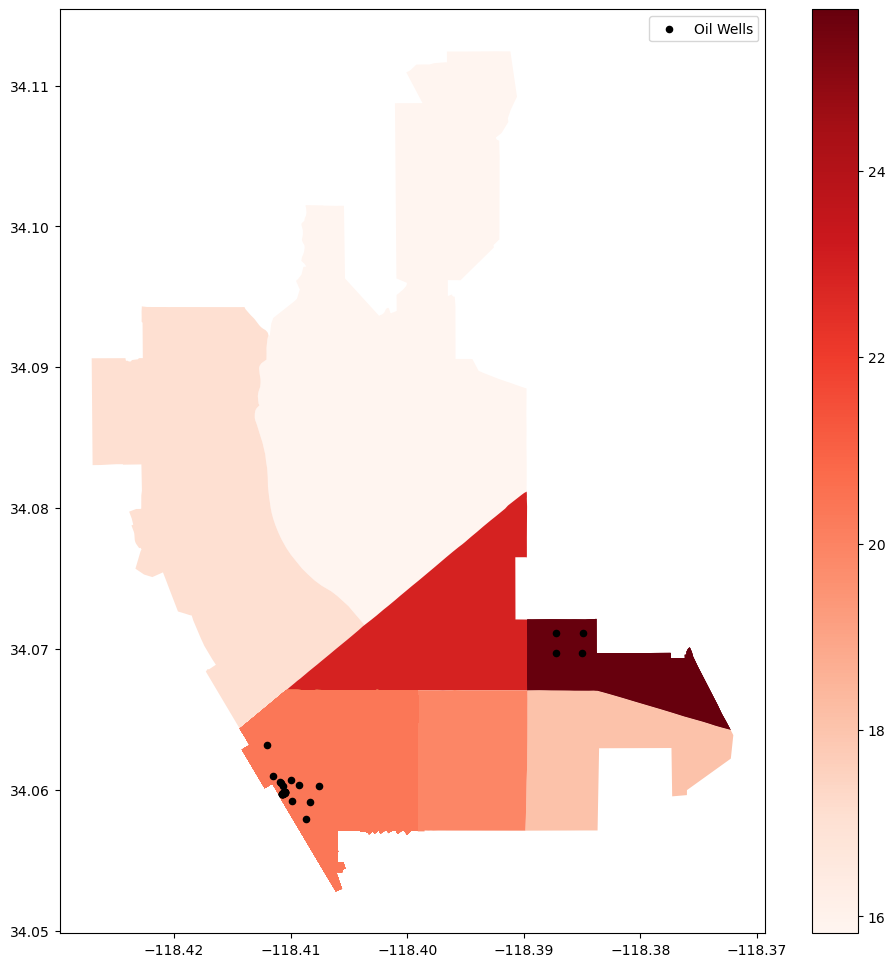

In [19]:
fig,ax = plt.subplots(figsize=(12,12))

# plot variable
gdfBH.plot(ax=ax,column='CES 4.0 Score',legend=True,cmap='Reds')

# plot oil wells
ax.scatter(gdfBH['Longitude'], gdfBH['Latitude'], color='black', marker='o', label='Oil Wells', s=20)

plt.legend()
plt.show()

Create a function to iterate over various columns in "calenviroscreen" to explore the correlation between environmental and health factors in the dataset with the CES score, examining how these relationships vary across census tracts in Beverly Hills.

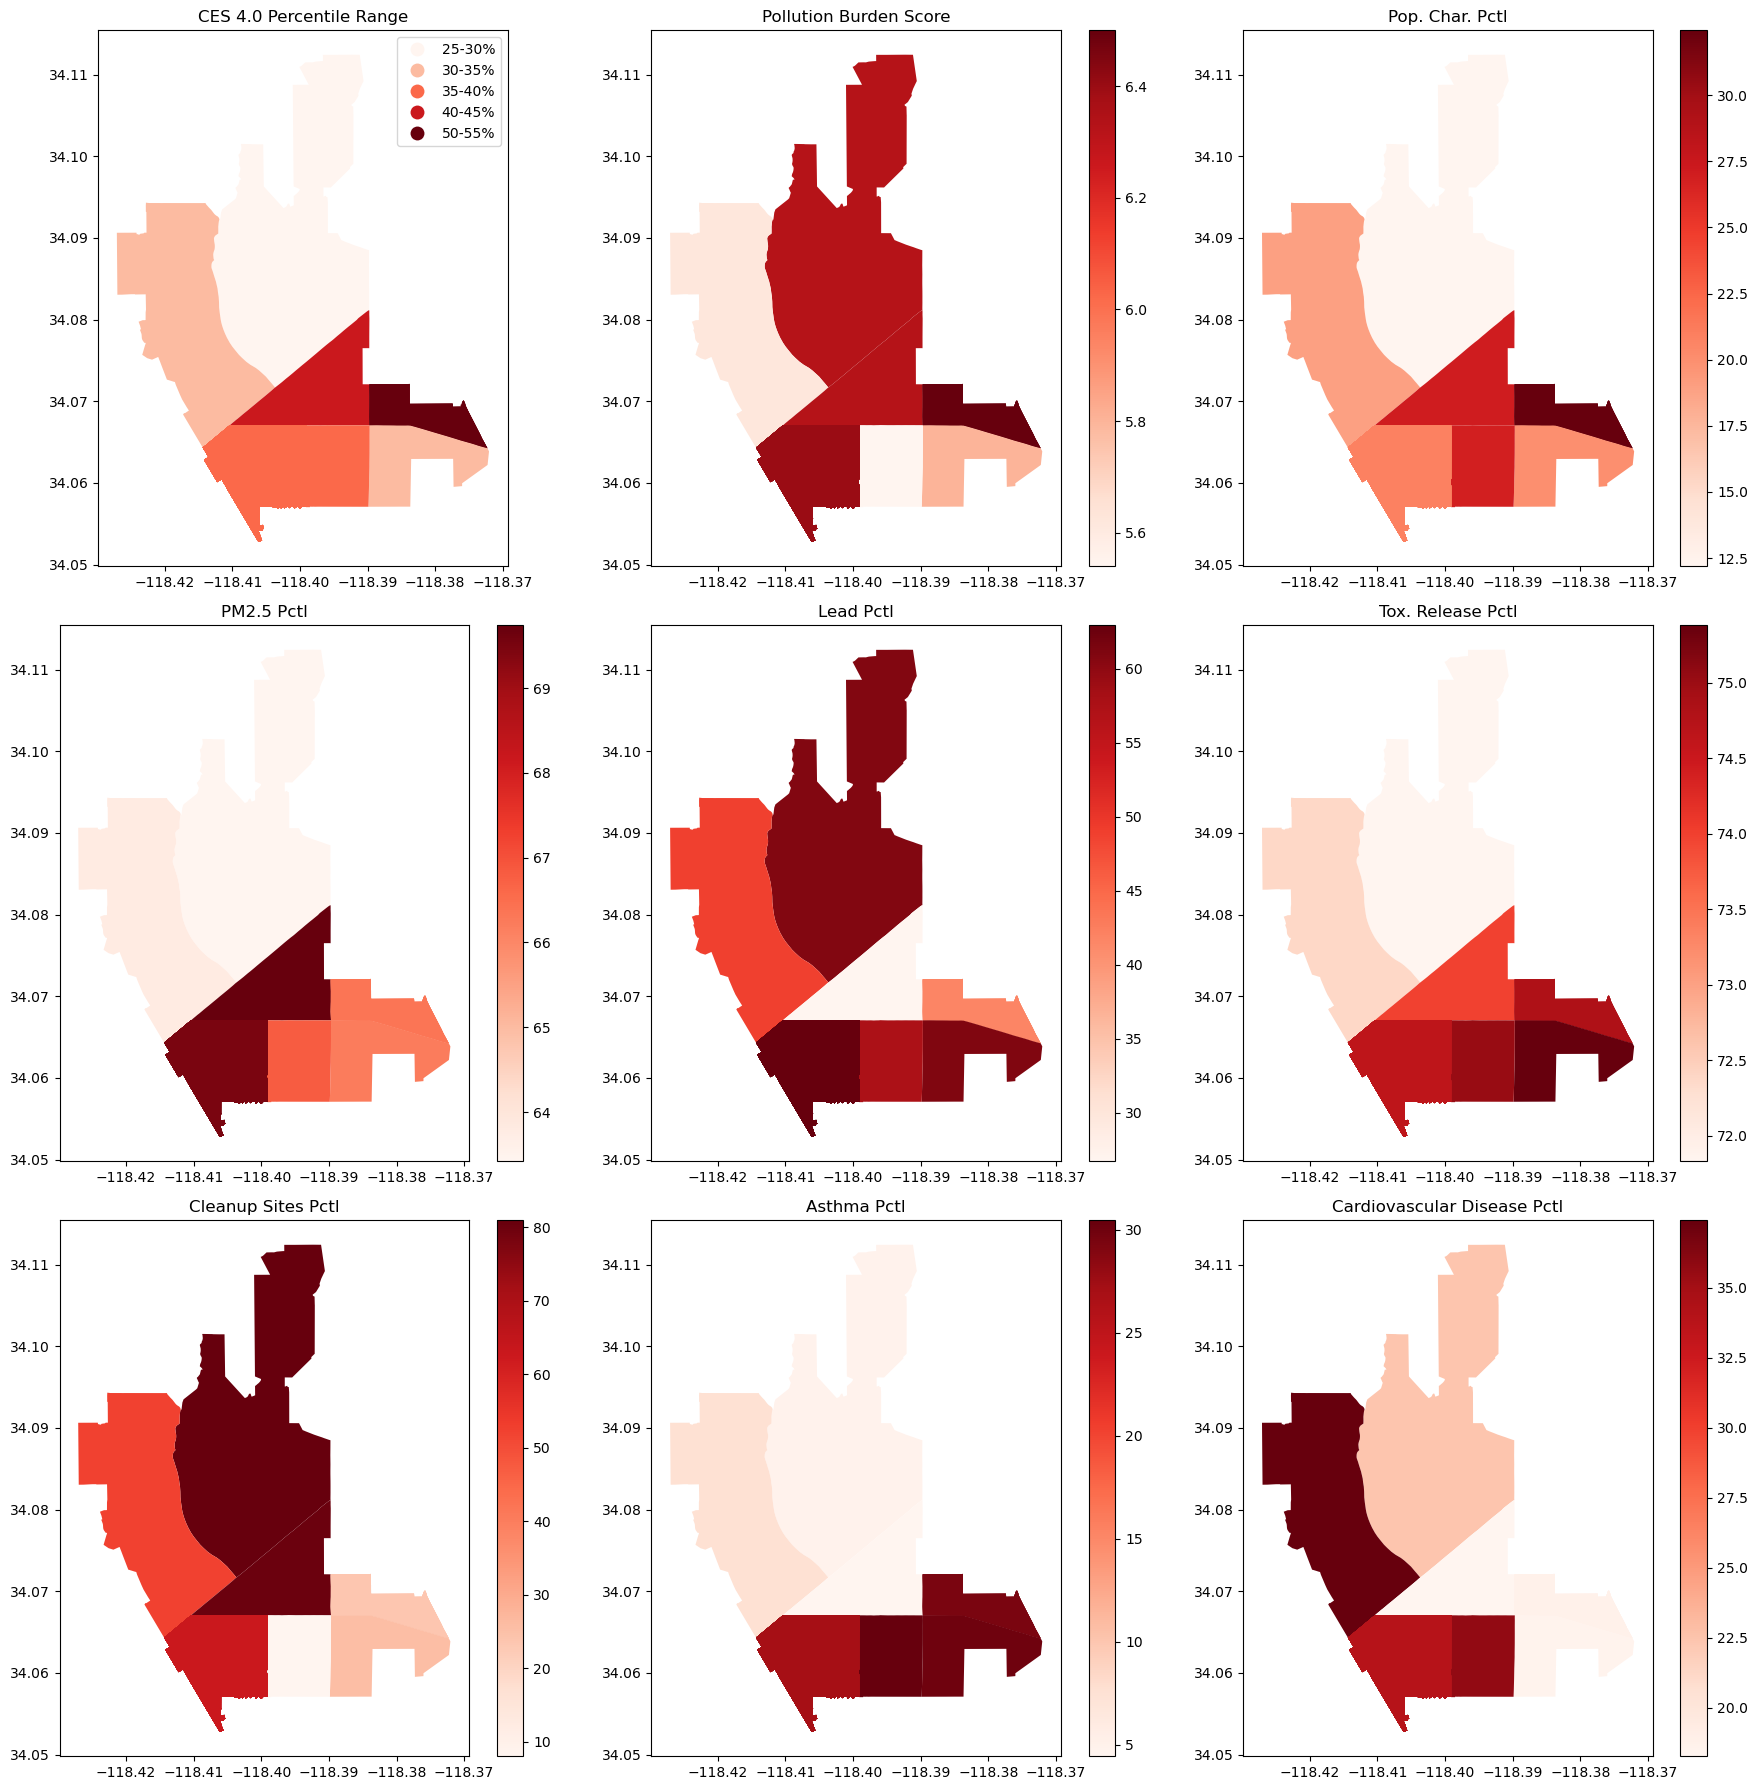

In [21]:
def plot_CES_map(gdf, factor, ax):
    gdf.plot(ax=ax, column=factor, legend=True, cmap='Reds')
    ax.set_title(factor)

def calenvirofactor():
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    axs = axs.flatten()

    # List of factors
    factors = ['CES 4.0 Percentile Range', 'Pollution Burden Score', 'Pop. Char. Pctl',
               'PM2.5 Pctl', 'Lead Pctl', 'Tox. Release Pctl',
               'Cleanup Sites Pctl', 'Asthma Pctl', 'Cardiovascular Disease Pctl', 'Low Birth Weight Pctl']

    for factor, ax in zip(factors, axs):
        plot_CES_map(gdfBH, factor, ax)

    plt.tight_layout()
    plt.show()

calenvirofactor()

These charts show us that while tracts in Beverly Hills do not necessarily receive high CES scores, the neighborhood still experiences pollution burden and a high level of clean up sites, among other contributing factors as well. I think it will be interesting to take the next steps in comparing these figures with those from the Inglewood neighborhood to identify if there are any patterns.

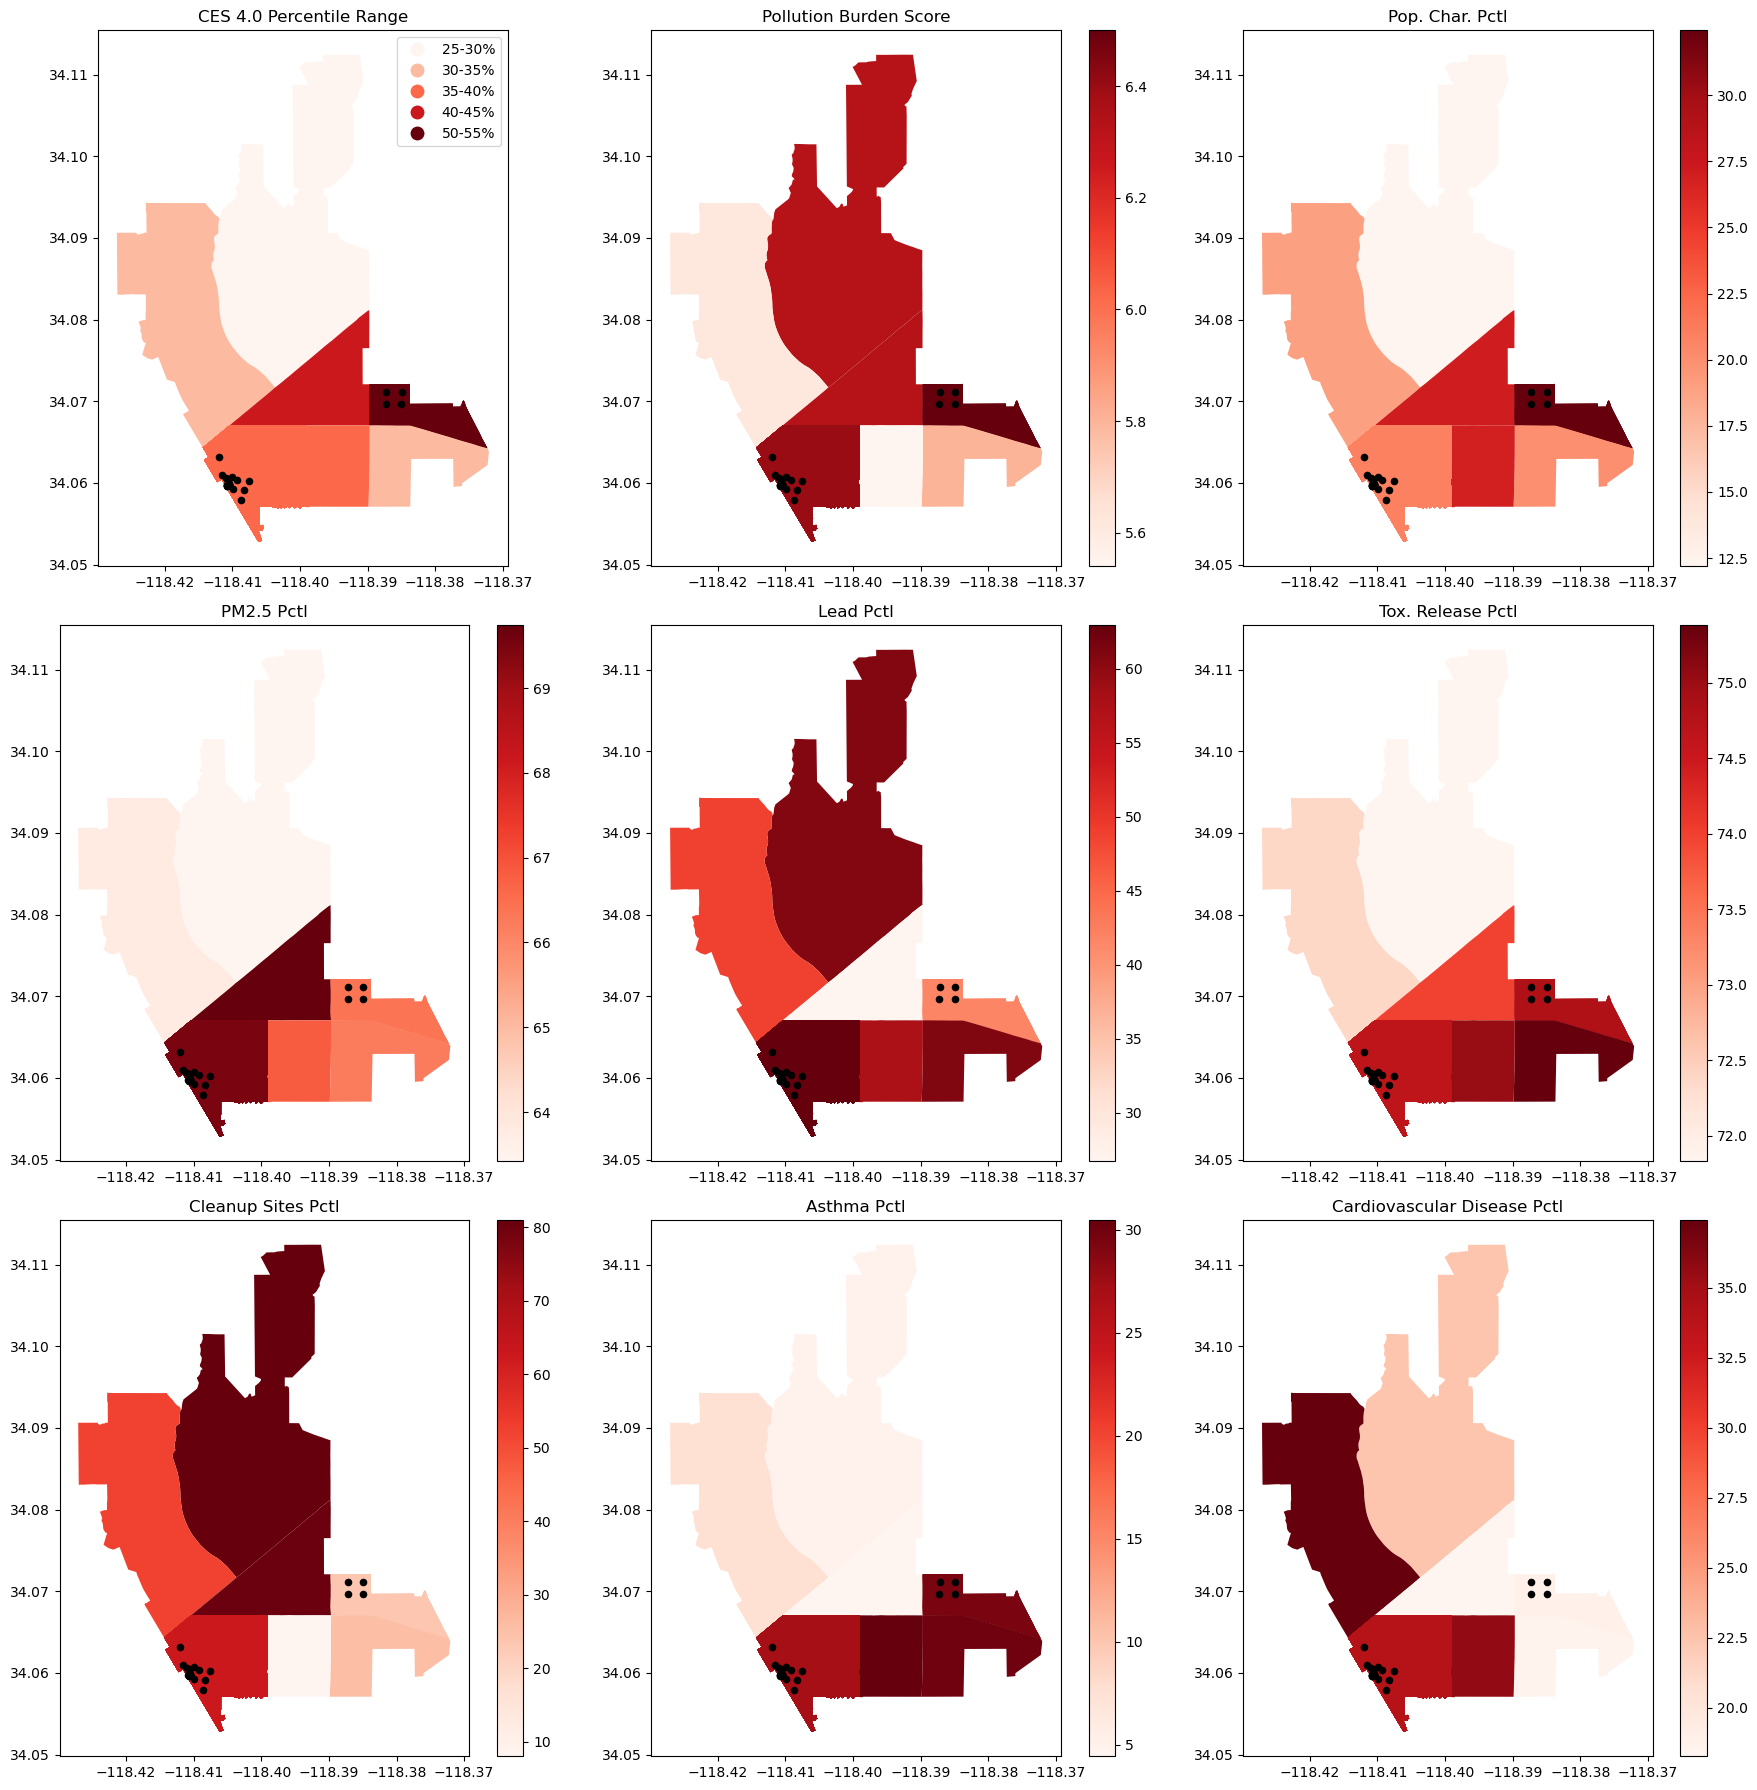

In [22]:
def plot_CES_map(gdf, factor, ax, overlay_points=None):
    # Plot CES data
    gdf.plot(ax=ax, column=factor, legend=True, cmap='Reds')
    ax.set_title(factor)
    
    # show oil wells as an overlay
    if overlay_points is not None:
        # Plot overlay points
        ax.scatter(overlay_points['Longitude'], overlay_points['Latitude'], color='black', marker='o', label='Oil Wells', s=20)

def calenvirofactor():
    fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(18, 18))
    axs = axs.flatten()

    # List of factors
    factors = ['CES 4.0 Percentile Range', 'Pollution Burden Score', 'Pop. Char. Pctl',
               'PM2.5 Pctl', 'Lead Pctl', 'Tox. Release Pctl',
               'Cleanup Sites Pctl', 'Asthma Pctl', 'Cardiovascular Disease Pctl', 'Low Birth Weight Pctl']

    for factor, ax in zip(factors, axs):
        plot_CES_map(gdfBH, factor, ax, overlay_points=gdfBH)

    plt.tight_layout()
    plt.show()

calenvirofactor()


These charts help provide context when looking at each variable. The locations of the oil wells help show why some variables may score certain ways compared to others. I am interested in doing side by side comparisons with the same variables from the Inglewood neighborhood to see if we can narrow down to critical variables of interest. I think the pollution burden score may be especially interesting to compare across along with the overall CES score.